**Performing n-way k shot on mnist**


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images = np.expand_dims(train_images, axis=-1)  # Adds the channel dimension
test_images = np.expand_dims(test_images, axis=-1)


In [ ]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [ ]:

# Define the Matching Network model
def build_model(input_shape=(28, 28, 1), n_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Output layer with softmax activation for classification
    outputs = layers.Dense(n_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = build_model()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 145ms/step - accuracy: 0.9056 - loss: 0.3069 - val_accuracy: 0.9861 - val_loss: 0.0397
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 134s 137ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9877 - val_loss: 0.0354
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 135ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9877 - val_loss: 0.0357
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 145s 139ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9904 - val_loss: 0.0323
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 135ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9888 - val_loss: 0.0374


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 6s - 19ms/step - accuracy: 0.9888 - loss: 0.0374
Test accuracy: 0.9888


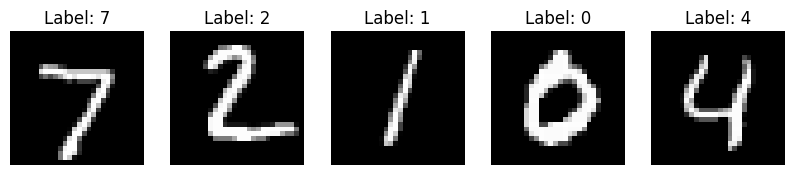

In [ ]:
def display_images(images, labels, n=5):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

display_images(test_images, test_labels)

In [ ]:
def few_shot_evaluation(model, support_set, support_labels, query_set, query_labels, n_shots=5):
    model.fit(support_set, support_labels, epochs=5, batch_size=1, verbose=0)
    query_loss, query_acc = model.evaluate(query_set, query_labels, verbose=0)
    return query_acc

In [ ]:
support_images = test_images[:5]  # Simulate support set with 5 images
support_labels = test_labels[:5]
query_images = test_images[5:10]  # Simulate query set with next 5 images
query_labels = test_labels[5:10]


The query set is used to test how well the model can generalize to new, unseen data after learning from the small support set.

In [ ]:
accuracy = few_shot_evaluation(model, support_images, support_labels, query_images, query_labels)
print(f"Few-shot learning accuracy: {accuracy:.4f}")

Few-shot learning accuracy: 1.0000


In [ ]:
print(support_labels)

[7 2 1 0 4]


Support Set:


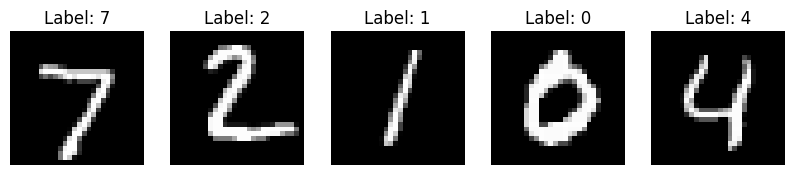

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Query Set Predictions:


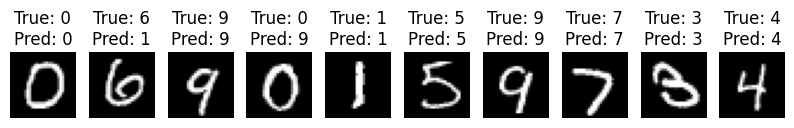


Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2

    accuracy                           0.80        10
   macro avg       0.77      0.81      0.77        10
weighted avg       0.78      0.80      0.76        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


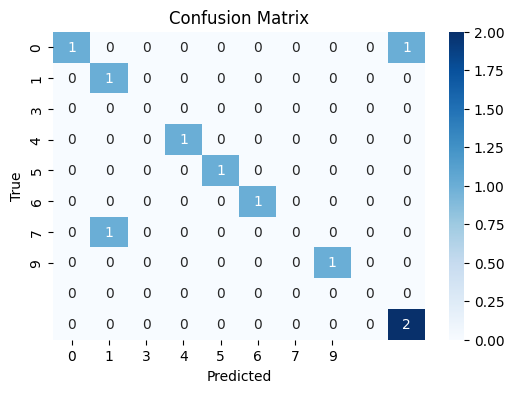

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

def few_shot_evaluation_extended(model, support_set, support_labels, query_set, query_labels, n_shots=5):

    print("Support Set:")
    display_images(support_set.squeeze(), support_labels, n=n_shots)
    #squeeze() removes the unnecessary dimension. suppose (10,28,28,1) => (10,28,28)

    model.fit(support_set, support_labels, epochs=5, batch_size=1, verbose=0)
    query_preds = np.argmax(model.predict(query_set), axis=-1)

    # Display query images with predictions
    print("\nQuery Set Predictions:")
    plt.figure(figsize=(10, 2))
    for i in range(len(query_set)):
        plt.subplot(1, len(query_set), i + 1)
        plt.imshow(query_set[i].squeeze(), cmap='gray')
        plt.title(f"True: {query_labels[i]}\nPred: {query_preds[i]}")
        plt.axis('off')
    plt.show()

    # Metrics
    accuracy = accuracy_score(query_labels, query_preds)
    print(f"\nAccuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(query_labels, query_preds))

    # Confusion matrix
    cm = tf.math.confusion_matrix(query_labels, query_preds).numpy()
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(query_labels),
                yticklabels=np.unique(query_labels))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return accuracy

# Extended test few-shot evaluation
support_images = test_images[:10]  # Support set with 10 images (2 samples per class)
support_labels = test_labels[:10]
query_images = test_images[10:20]  # Query set with 10 images
query_labels = test_labels[10:20]

accuracy = few_shot_evaluation_extended(model, support_images, support_labels, query_images, query_labels)


**Performing Siamese Networks on Breakhis Dataset**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

In [ ]:
train_path = "/content/drive/MyDrive/Research/BreakHis/Train"
test_path = "/content/drive/MyDrive/Research/BreakHis/Test"

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
EPOCHS = 30
PAIR_SAMPLE_SIZE = 500

In [ ]:

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training",
    shuffle=True
)

test_gen = datagen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)




# Helper function to create pairs



Found 6327 images belonging to 2 classes.
Found 1582 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import models

In [ ]:
def create_base_cnn(input_shape):
      model = models.Sequential([
      # ConvBlock 1
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      layers.MaxPool2D((2, 2)),

      # ConvBlock 2
      layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      layers.MaxPool2D((2, 2)),

      # ConvBlock 3
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.MaxPool2D((2, 2)),

      # ConvBlock 4
      layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      layers.MaxPool2D((2, 2)),

      # ConvBlock 5
      layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
      layers.MaxPool2D((2, 2)),

      layers.Flatten(),
      layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
    ])
      return model


Siamese networks are used to learn a similarity function between inputs. They are often used for tasks like image verification, where you want to determine if two images are of the same object or person.

In [ ]:
def siamese_network(input_shape):
    base_cnn = create_base_cnn(input_shape)
#These lines define two input tensors, input_a and input_b, representing the two images that will be compared by the Siamese network.

    input_a = layers.Input(shape=input_shape)
    input_b = layers.Input(shape=input_shape)

    processed_a = base_cnn(input_a)
    processed_b = base_cnn(input_b)

    # L1 Distance for similarity scoring, calculates the distance between the feature representations of the two input images.
    distance = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))(
        [processed_a, processed_b]
    )
    outputs = layers.Dense(1, activation="sigmoid")(distance)

    return Model(inputs=[input_a, input_b], outputs=outputs)

In [ ]:
model = siamese_network((*IMAGE_SIZE, 3))
model.compile(optimizer=optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])
#The asterisk (*) in *IMAGE_SIZE is used to unpack the tuple IMAGE_SIZE. This essentially transforms (224, 224) into two separate arguments, 224 and 224.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#designed to create pairs of images for training a Siamese network.
def create_limited_pairs(generator, sample_size):
    pairs = []
    labels = []
    images, labels_batch = [], []

    # Collect all images and labels
    for _ in range(len(generator)):
        batch_images, batch_labels = next(generator)
        images.extend(batch_images)
        labels_batch.extend(batch_labels)
        if len(images) >= sample_size:
            break

    images = np.array(images[:sample_size])
    labels_batch = np.array(labels_batch[:sample_size])

    # Create pairs from limited samples
    for _ in range(sample_size // 2):
        i, j = random.sample(range(sample_size), 2)
        pairs.append([images[i], images[j]])
        labels.append(1 if labels_batch[i] == labels_batch[j] else 0)

    pairs = np.array(pairs)
    labels = np.array(labels)
    return pairs, labels

In [ ]:
train_pairs, train_labels = create_limited_pairs(train_gen, PAIR_SAMPLE_SIZE)


train_pairs_a, train_pairs_b = train_pairs[:, 0], train_pairs[:, 1]


In [ ]:
history = model.fit(
    [train_pairs_a, train_pairs_b],
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5326 - loss: 0.7048
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.5192 - loss: 0.7059
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5076 - loss: 0.6968
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.5605 - loss: 0.6938
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.5807 - loss: 0.6944
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5523 - loss: 0.6903
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5355 - loss: 0.6979
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.5451 - loss: 0.6900
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.5529 - loss: 0.6922
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.5374 - loss: 0.6901
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.5053 - loss: 0.6933
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.5528 - loss

In [ ]:
test_pairs, test_labels = create_limited_pairs(test_gen, PAIR_SAMPLE_SIZE // 2)
test_pairs_a, test_pairs_b = test_pairs[:, 0], test_pairs[:, 1]
test_loss, test_acc = model.evaluate([test_pairs_a, test_pairs_b], test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.5291 - loss: 0.6916
Test Accuracy: 54.40%


In [ ]:
#after basic exp, use k-fold

In [ ]:
path="/content/drive/MyDrive/Research/BreakHis/siamese_model.h5"
model.save(path)

In [ ]:
path="/content/drive/MyDrive/Research/BreakHis/siamese_model.h5"
